# MNIST Dataset with Neural Networks

This notebook is a simple example of how to use neural networks to classify the MNIST dataset. The MNIST dataset is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

The notebook is divided into the following sections:

1. Load the MNIST dataset: The dataset is loaded using the `keras.datasets` module.
2. Preprocess the data: The data is preprocessed by normalizing the pixel values to be between 0 and 1.
3. Build the neural network: The neural network is built using the `tf.keras` module.
4. Train the neural network: The neural network is trained on the training data.
5. Evaluate the neural network: qThe neural network is evaluated on the test data.

In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.activations import linear, relu
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.datasets import mnist

In [10]:
# load mnist data to x_train, y_train, x_test, y_test
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [11]:
# flatten the 28x28 images to 784x1
train_X = train_X.reshape(-1, 784)
test_X = test_X.reshape(-1, 784)
print("train_X shape:", train_X.shape, "test_X shape:", test_X.shape)

train_X shape: (60000, 784) test_X shape: (10000, 784)


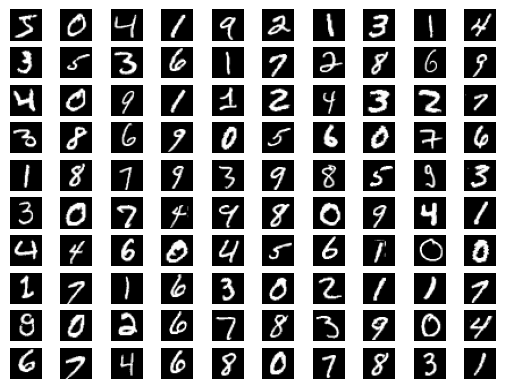

In [12]:
# normalize the data
train_X = train_X / 255.0
test_X = test_X / 255.0

#  print first 100 images
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(train_X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

In [13]:
# build model
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(128, activation=relu))
model.add(Dense(128, activation=relu))
model.add(Dense(10, activation=linear))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.build()

In [15]:
# compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
# train model
model.fit(train_X, train_y, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8851 - loss: 0.4053
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9696 - loss: 0.1013
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0618
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9843 - loss: 0.0481
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9872 - loss: 0.0380
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9899 - loss: 0.0300
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9920 - loss: 0.0242
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9936 - loss: 0.0199
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9943 - loss: 0.0170
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9935 - loss: 0.0185
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9958 - loss: 0.0126
Epoch 12/20
1875/1875 ━━━━━━━━

In [16]:
# evaluate model
loss, accuracy = model.evaluate(test_X, test_y)
print(f'loss: {loss}, accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9741 - loss: 0.1487
loss: 0.12803390622138977, accuracy: 0.9775000214576721
